In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster

In [2]:
data = pd.read_csv('./airbnb_pca.csv')

In [3]:
data.head()

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,...,40,41,42,43,44,45,46,47,48,49
0,low,Skylit Midtown Castle,2595.0,225.0,22.500000,10.0,0.0,1.0,Manhattan,Midtown,...,0.029520,0.251211,0.054273,0.017186,0.182832,0.943999,1.002324,1.097540,0.914941,-0.404713
1,medium,Large Cozy 1 BR Apartment In Midtown East,5099.0,200.0,66.666667,3.0,1.0,1.0,Manhattan,Murray Hill,...,-0.033454,0.039465,-0.289800,0.068572,0.058562,-0.056426,1.250754,0.816075,-0.301431,-0.019679
2,low,BlissArtsSpace!,5121.0,60.0,2.068966,29.0,1.0,1.0,Brooklyn,Bedford-Stuyvesant,...,-0.163360,0.353798,0.157065,-0.096169,-0.038425,-0.007208,0.026336,0.058857,0.072593,0.029497
3,low,Large Furnished Room Near B'way,5178.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Hell's Kitchen,...,0.148991,0.232485,-0.705775,0.035140,0.303981,-0.012175,-0.879333,0.381309,-0.399937,-0.187848
4,low,Cozy Clean Guest Room - Family Apt,5203.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Upper West Side,...,0.450295,0.120002,0.103434,0.055290,0.469955,0.064334,0.917960,1.160511,0.050689,-0.416472


In [4]:
# gather all the PCA components
# rename the PC columns
pc_col_names = ["pc_" + item for item in list(data.columns[10:])]

# extract the 75 principal components
pc_data = data.iloc[:, 10:]

# rename the columns
pc_data.columns = pc_col_names

In [5]:
pc_data.shape

(34547, 50)

In [6]:
pc_data.to_csv('./pc_data.csv',index=False)

In [7]:
pc_data.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_40,pc_41,pc_42,pc_43,pc_44,pc_45,pc_46,pc_47,pc_48,pc_49
0,2.040408,-0.611301,0.032546,0.678397,-0.491853,-0.890303,-0.470255,-0.018804,0.072064,1.352805,...,0.029520,0.251211,0.054273,0.017186,0.182832,0.943999,1.002324,1.097540,0.914941,-0.404713
1,1.682473,-0.875044,-0.104594,0.117284,-0.142246,-0.782542,-0.889862,-0.153305,0.526997,-0.473992,...,-0.033454,0.039465,-0.289800,0.068572,0.058562,-0.056426,1.250754,0.816075,-0.301431,-0.019679
2,-2.016898,1.760025,0.531260,0.397882,-0.952575,-0.530253,-0.973099,0.987037,-0.619842,0.427319,...,-0.163360,0.353798,0.157065,-0.096169,-0.038425,-0.007208,0.026336,0.058857,0.072593,0.029497
3,-0.165656,0.077436,0.592298,-0.820660,0.278002,-0.184321,-0.835664,0.348599,-0.428157,-0.363621,...,0.148991,0.232485,-0.705775,0.035140,0.303981,-0.012175,-0.879333,0.381309,-0.399937,-0.187848
4,-1.211819,-0.761037,1.359039,1.022477,0.690092,0.107377,-0.388839,-0.106137,0.127953,-0.230334,...,0.450295,0.120002,0.103434,0.055290,0.469955,0.064334,0.917960,1.160511,0.050689,-0.416472


In [8]:
# Fit Kmeans and calculate SSE for each k value
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pc_data)
    sse[k] = kmeans.inertia_ # sum of squared distances to the closest cluster centers

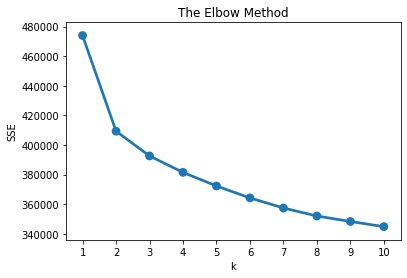

In [9]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(pc_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [11]:
# get the labels
cluster_labels = kmeans.labels_

# assign these clusters back into the dataframe
pc_data_k3 = pc_data.assign(cluster=cluster_labels)

# display the shape
pc_data_k3.shape

(34547, 51)

In [12]:
pc_data_k3.cluster.value_counts()

0    14456
2    11047
1     9044
Name: cluster, dtype: int64

In [13]:
other_col_names = list(data.columns[:10])
other_col_names

['price_category',
 'name',
 'id',
 'price',
 'adjusted_price',
 'minimum_nights',
 'bedrooms',
 'bathrooms',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed']

In [14]:
k_means_visual = data[other_col_names]
k_means_visual.shape

(34547, 10)

In [15]:
k_means_visual = k_means_visual.assign(cluster=cluster_labels)
k_means_visual.head()

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,cluster
0,low,Skylit Midtown Castle,2595.0,225.0,22.500000,10.0,0.0,1.0,Manhattan,Midtown,0
1,medium,Large Cozy 1 BR Apartment In Midtown East,5099.0,200.0,66.666667,3.0,1.0,1.0,Manhattan,Murray Hill,0
2,low,BlissArtsSpace!,5121.0,60.0,2.068966,29.0,1.0,1.0,Brooklyn,Bedford-Stuyvesant,1
3,low,Large Furnished Room Near B'way,5178.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Hell's Kitchen,1
4,low,Cozy Clean Guest Room - Family Apt,5203.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Upper West Side,2


In [16]:
k_means_visual.to_csv("./k_means_visual.csv")

### Visualize K-means clusters on a folium map

In [17]:
import numpy as np
import os
import geopandas
import folium
from matplotlib.collections import PatchCollection
from matplotlib import pyplot
from shapely.geometry import LineString
from descartes import PolygonPatch
%matplotlib inline

In [18]:
airbnb_clean = pd.read_csv('./airbnb_clean.csv')
airbnb_clean.shape

(34547, 79)

In [94]:
airbnb_clean.head()

,id,name,summary,description,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,2595.0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart...",6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",Midtown,Manhattan,40.75362,...,0,0,0,1,0,0,0,1,0,1
1,5099.0,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,My large 1 bedroom apartment has a true New Yo...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Murray Hill,Manhattan,40.74767,...,0,1,0,0,0,0,0,1,0,1
2,5121.0,BlissArtsSpace!,,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Bedford-Stuyvesant,Brooklyn,40.68688,...,0,0,0,1,0,0,1,0,1,0
3,5178.0,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",Hell's Kitchen,Manhattan,40.76489,...,0,0,0,1,0,0,1,0,1,0
4,5203.0,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...","Our best guests are seeking a safe, clean, spa...",1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",Upper West Side,Manhattan,40.80178,...,1,0,0,0,0,0,0,1,0,1


In [95]:
justlistings=pd.read_csv("./dec_listings.csv.gz")

/Users/ikhyvicky/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
justlistings.head(1)
    

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39


In [119]:
airbnb_coord = airbnb_clean1[['latitude', 'longitude','listing_url']]

In [120]:
k_means_map = pd.concat([k_means_visual, airbnb_coord], axis=1)

In [121]:
nbhoods = geopandas.read_file("./neighbourhoods.geojson")

In [122]:
k_means_map_geo = geopandas.GeoDataFrame(k_means_map, geometry=geopandas.points_from_xy(k_means_map.longitude,
                                                                            k_means_map.latitude))

In [123]:
k_means_map_geo.to_csv("./k_means_map_geo.csv")

In [124]:
k_means_map_geo.head()

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,cluster,latitude,longitude,listing_url,geometry
0,low,Skylit Midtown Castle,2595.0,225.0,22.500000,10.0,0.0,1.0,Manhattan,Midtown,0,40.75362,-73.98377,https://www.airbnb.com/rooms/2595,POINT (-73.98377 40.75362)
1,medium,Large Cozy 1 BR Apartment In Midtown East,5099.0,200.0,66.666667,3.0,1.0,1.0,Manhattan,Murray Hill,0,40.74767,-73.97500,https://www.airbnb.com/rooms/5099,POINT (-73.97500 40.74767)
2,low,BlissArtsSpace!,5121.0,60.0,2.068966,29.0,1.0,1.0,Brooklyn,Bedford-Stuyvesant,1,40.68688,-73.95596,https://www.airbnb.com/rooms/5121,POINT (-73.95596 40.68688)
3,low,Large Furnished Room Near B'way,5178.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Hell's Kitchen,1,40.76489,-73.98493,https://www.airbnb.com/rooms/5178,POINT (-73.98493 40.76489)
4,low,Cozy Clean Guest Room - Family Apt,5203.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Upper West Side,2,40.80178,-73.96723,https://www.airbnb.com/rooms/5203,POINT (-73.96723 40.80178)


In [98]:
listingid=[]
for i in k_means_map_geo.id:
    if i not in listingid:
        listingid.append(i)
print(len(listingid))

34547


In [103]:
filtered=justlistings[justlistings.id.isin(listingid)]

In [104]:
filtered.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39
2,5099,https://www.airbnb.com/rooms/5099,20191204162729,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.60
3,5121,https://www.airbnb.com/rooms/5121,20191204162729,2019-12-06,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38
4,5178,https://www.airbnb.com/rooms/5178,20191204162729,2019-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.52
5,5203,https://www.airbnb.com/rooms/5203,20191204162729,2019-12-06,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",none,Our neighborhood is full of restaurants and ca...,...,f,f,flexible,t,t,1,0,1,0,0.95


In [108]:
justurl=filtered[['listing_url']]

In [110]:
justurl.reset_index(inplace=True)

In [114]:
airbnb_clean1=pd.concat([airbnb_clean,justurl],axis=1)

In [117]:
airbnb_clean1.drop(columns='index',inplace=True)

In [118]:
airbnb_clean1.isnull().sum()

id                                    0
name                                  0
summary                               0
description                           0
host_listings_count                   0
                                     ..
require_guest_profile_picture_f       0
require_guest_profile_picture_t       0
require_guest_phone_verification_f    0
require_guest_phone_verification_t    0
listing_url                           0
Length: 80, dtype: int64

In [138]:
airbnb_clean1.to_csv("./airbnb_clean1.csv")

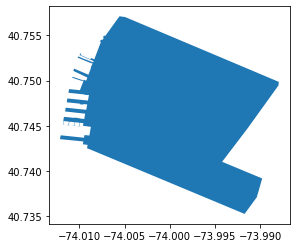

In [126]:
chelsea = nbhoods[nbhoods.neighbourhood == 'Chelsea'].geometry
ax=chelsea.plot()


In [127]:
k_means_map_geo.neighbourhood_cleansed.nunique()

219

In [128]:
# get chelsea airbnb listings co-ordinates and their assigned clusters
chelsea_listings = k_means_map_geo[(k_means_map_geo.neighbourhood_cleansed == 'Chelsea') &
            (k_means_map_geo.bedrooms == 1) & (k_means_map_geo.minimum_nights == 1) &
            (k_means_map_geo.price < 150)]


In [129]:
chelsea_listings

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,cluster,latitude,longitude,listing_url,geometry
10,medium,"Chelsea Perfect by Doti, an AIRBNB Super Host!",7322.0,120.0,120.0,1.0,1.0,1.0,Manhattan,Chelsea,0,40.74192,-73.99501,https://www.airbnb.com/rooms/7322,POINT (-73.99501 40.74192)
166,medium,Prime Location in Manhattan,51572.0,123.0,123.0,1.0,1.0,1.0,Manhattan,Chelsea,0,40.74859,-73.99671,https://www.airbnb.com/rooms/51572,POINT (-73.99671 40.74859)
980,medium,Beautiful Downtown Manhattan Share,502132.0,50.0,50.0,1.0,1.0,1.0,Manhattan,Chelsea,2,40.73942,-74.00009,https://www.airbnb.com/rooms/502132,POINT (-74.00009 40.73942)
1343,medium,"Sunny & Clean Apt, Ideal Location",731316.0,140.0,140.0,1.0,1.0,1.0,Manhattan,Chelsea,2,40.74092,-74.00037,https://www.airbnb.com/rooms/731316,POINT (-74.00037 40.74092)
2584,medium,The heart of Manhattan - NYC,1903249.0,75.0,75.0,1.0,1.0,1.0,Manhattan,Chelsea,0,40.74676,-74.00234,https://www.airbnb.com/rooms/1903249,POINT (-74.00234 40.74676)
5889,medium,"NYC Prime Location Bedroom, directly above Sub...",5958299.0,110.0,110.0,1.0,1.0,1.0,Manhattan,Chelsea,0,40.74717,-73.99179,https://www.airbnb.com/rooms/5958299,POINT (-73.99179 40.74717)
6614,medium,Awesome Location with Best Commute,6831518.0,99.0,99.0,1.0,1.0,0.5,Manhattan,Chelsea,2,40.74733,-73.99023,https://www.airbnb.com/rooms/6831518,POINT (-73.99023 40.74733)
8543,medium,Private room in unique Chelsea loft,9183131.0,139.0,139.0,1.0,1.0,1.0,Manhattan,Chelsea,2,40.74406,-73.99287,https://www.airbnb.com/rooms/9183131,POINT (-73.99287 40.74406)
8779,medium,Prime Location in CHELSEA,9464543.0,98.0,98.0,1.0,1.0,1.0,Manhattan,Chelsea,1,40.74601,-73.99987,https://www.airbnb.com/rooms/9464543,POINT (-73.99987 40.74601)
9886,medium,Room in Huge Union Sq Rooftop Apt!,10904914.0,70.0,70.0,1.0,1.0,2.0,Manhattan,Chelsea,2,40.73860,-73.99775,https://www.airbnb.com/rooms/10904914,POINT (-73.99775 40.73860)


In [81]:
for i in chelsea_listings.iterrows():
    print(i[1])

price_category                                                            medium
name                            Chelsea Perfect  by Doti, an AIRBNB  Super Host!
id                                                                          7322
price                                                                        120
adjusted_price                                                               120
minimum_nights                                                                 1
bedrooms                                                                       1
bathrooms                                                                      1
neighbourhood_group_cleansed                                           Manhattan
neighbourhood_cleansed                                                   Chelsea
cluster                                                                        0
latitude                                                                 40.7419
longitude                   

In [ ]:
popup = folium.Popup('<a href=" [URL GOES HERE] "target="_blank"> [text for link goes here]' </a>')

In [170]:
m = folium.Map(location=[40.74601, -73.99987], zoom_start=14.5)
folium.GeoJson(chelsea).add_to(m)


# Build markers and popups
for row in chelsea_listings.iterrows():
    row_values = row[1]
    center_point = row_values['geometry']
    location = [center_point.y, center_point.x]
    if row_values['cluster'] == 0:
        marker_color = 'lightred'
    elif row_values['cluster'] == 1:
        marker_color = 'cadetblue'
    else:
        marker_color = 'lightgreen'
    popup = (str(row_values['name']) +
             '  ' + 'PRICE: $' + str(row_values['price'])
            +'     '+ f'<a href="{row_values.listing_url} "target="_blank" > "Find Me Here" </a>')
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color=marker_color, icon='home'))
    marker.add_to(m)
display(m)

In [32]:
finalfiltered=pd.read_csv('./finalfitered.csv')

In [44]:
finalfiltered.head()

,listing_id,id,date,reviewer_id,reviewer_name,translated,Dominant_Topic,Topic_Perc_Contrib,Keywords,sentiment_score
0,2595,19176,2009-12-05,53267,Cate,Great experience.,3.0,0.2857,"place, great, stay, location, nice, good, host...",0.6249
1,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,3.0,0.3274,"place, great, stay, location, nice, good, host...",0.9248
2,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",3.0,0.3450,"place, great, stay, location, nice, good, host...",0.9229
3,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,0.0,0.4837,"apartment, clean, recommend, comfortable, well...",0.9464
4,2595,1238204,2012-05-07,1783688,Sergey,Hi to everyone!\nWould say our greatest compli...,0.0,0.2470,"apartment, clean, recommend, comfortable, well...",0.9869


In [47]:
df = pd.DataFrame({'a': [1, 10, 8, 11, -1],
                'b': list('abdce'),
                'c': [1.0, 2.0, 5.0, 3.0, 4.0]})

In [48]:
df

,a,b,c
0,1,a,1.0
1,10,b,2.0
2,8,d,5.0
3,11,c,3.0
4,-1,e,4.0


In [49]:
df.nlargest(3, 'a')

,a,b,c
3,11,c,3.0
1,10,b,2.0
2,8,d,5.0


In [52]:
indexes=[]
for i in finalfiltered.listing_id:
    if i not in indexes:
        indexes.append(i)
print(len(indexes))

36181


In [87]:
for i in finalfiltered[finalfiltered['listing_id']==2595].nlargest(3,'sentiment_score')[['reviewer_name','translated']].iterrows():
    print(i[1])

reviewer_name                                              Yannick
translated       Jennifer was super friendly and helpful. Great...
Name: 14, dtype: object
reviewer_name                                               Sergey
translated       Hi to everyone!\nWould say our greatest compli...
Name: 4, dtype: object
reviewer_name                                                Nisha
translated       Jennifer's space was such a lovely experience....
Name: 15, dtype: object
